In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import multiprocessing as mul
from scipy import stats
import pickle
from scipy.integrate import quad
from corner import corner
import pandas as pd
from scipy.stats import gaussian_kde
import dynesty as dyn

In [2]:
all_BE = {}
for file in os.listdir('./outputs/BF/'):
    be = []
    with open('./outputs/BF/'+file, 'rb') as f:
        data = np.loadtxt(f, delimiter=',')
        be = data[:,0]/data[:,0][0]
    f.close()
    all_BE[file.replace('_results.txt', '')] = be
    with open('./outputs/BE/'+file, 'wb') as f:
        np.savetxt(f, be, delimiter=',')
        
    f.close()

In [3]:
all_BE_df = pd.DataFrame(all_BE).T
all_BE_df.to_csv('./outputs/BE/BE0.csv')

Text(0.5, 1.0, 'BE distribution for Linear HP')

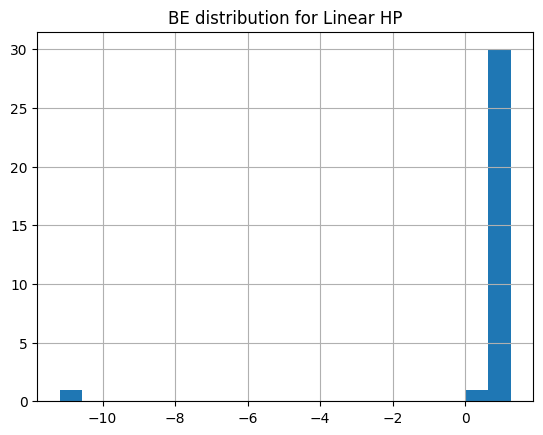

In [4]:
all_BE_df[1].hist(bins=20)
plt.title('BE distribution for Linear HP')

Text(0.5, 1.0, 'BE distribution for Quadratic HP')

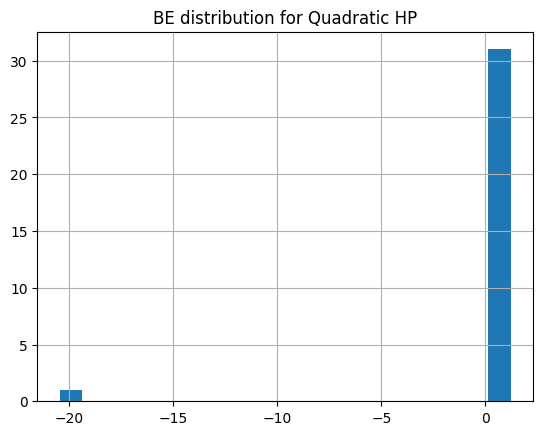

In [5]:
all_BE_df[2].hist(bins=20)
plt.title('BE distribution for Quadratic HP')

In [6]:
all_BE_df.drop(0, axis=1, inplace=False).to_csv('./outputs/BE/BE.csv')

In [7]:
all_BE_df.sort_index(inplace=True)

In [8]:
grbparam = pd.read_csv(os.getcwd() + '/../data/GRBPARAM.csv', index_col=0).T

In [9]:
grbparam.sort_index(inplace=True)

In [11]:
grbparam = np.round(grbparam, 2)

In [12]:
grbparam

GRB,E0,Emax,redshift
GRB080916C,10.0,600.0,4.35
GRB081221,10.0,300.0,2.26
GRB090328,30.0,500.0,0.74
GRB090618,10.0,700.0,0.54
GRB090926A,10.0,800.0,2.11
GRB091003A,10.0,800.0,0.90
GRB100728A,40.0,400.0,1.57
GRB120119A,25.0,500.0,1.73
GRB130427A,10.0,5000.0,0.34
GRB130518A,10.0,1200.0,2.49


In [13]:
all_BE_df.drop(0, axis=1, inplace=True)

In [14]:
new_df = pd.concat([grbparam, all_BE_df], axis=1)

In [15]:
new_df.drop(['Emax'], axis=1, inplace=True)

In [17]:
new_df = np.round(new_df, 2)

In [18]:
new_df.to_latex('./outputs/BE/GRBBE.tex')